In [11]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

In [25]:
#Load train and test from cifar10
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


In [23]:
#Resize images
IMG_SIZE = 32
x_train = tf.image.resize(x_train, [IMG_SIZE, IMG_SIZE]).numpy()
x_test = tf.image.resize(x_test, [IMG_SIZE, IMG_SIZE]).numpy()

#Normalize pixel values
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

#Split the dataset
VAL_SPLIT = 0.2
val_samples = int(len(x_train) * VAL_SPLIT)

x_val = x_train[-val_samples:]
y_val = y_train[-val_samples:]

x_train = x_train[:-val_samples]
y_train = y_train[:-val_samples]

#Printing the shapes for confirmation
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_val shape:", x_val.shape)
print("y_val shape:", y_val.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

x_train shape: (32000, 32, 32, 3)
y_train shape: (32000, 1)
x_val shape: (8000, 32, 32, 3)
y_val shape: (8000, 1)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


In [ ]:
#Data augmentation using tf.image
def augment_data(image, label):
  image = tf.image.random_flip_left_right(image)
  image = tf.image.random_brightness(image, max_delta=0.2)
  image = tf.image.random_contrast(image, lower=0.8, upper=1.2)
  image = tf.image.random_saturation(image, lower=0.8, upper=1.2)
  image = tf.image.random_hue(image, max_delta=0.1)
  return image, label

#Create TensorFlow Datasets
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_dataset = train_dataset.map(augment_data)

#Batch and prefetching data
BATCH_SIZE = 32
train_dataset = train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

In [13]:
# Define the CNN model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [9]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Model Summary
model.summary()

# Train the model
EPOCHS = 5
history = model.fit(train_dataset, epochs=EPOCHS, validation_data=(x_val, y_val))

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 8, 8, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_12               │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 552,874 (2.11 MB)

 Trainable params: 551,722 (2.10 MB)

 Non-trainable params: 1,152 (4.50 KB)

Epoch 1/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 397s 312ms/step - accuracy: 0.3198 - loss: 2.1250 - val_accuracy: 0.5909 - val_loss: 1.1494
Epoch 2/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 444s 314ms/step - accuracy: 0.5760 - loss: 1.1930 - val_accuracy: 0.6516 - val_loss: 1.1238
Epoch 3/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 390s 312ms/step - accuracy: 0.6585 - loss: 0.9912 - val_accuracy: 0.7149 - val_loss: 0.8135
Epoch 4/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 388s 311ms/step - accuracy: 0.6996 - loss: 0.8798 - val_accuracy: 0.6984 - val_loss: 0.8583
Epoch 5/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 388s 310ms/step - accuracy: 0.7280 - loss: 0.7934 - val_accuracy: 0.7868 - val_loss: 0.6249
Test Loss: 0.6532
Test Accuracy: 0.7757


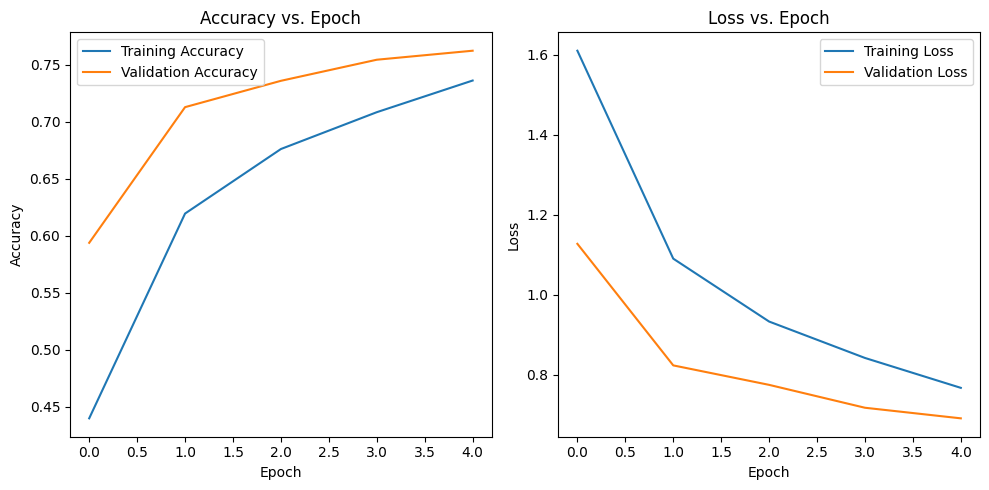

In [22]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy vs. Epoch')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss vs. Epoch')

plt.tight_layout()
plt.show()


In [18]:
# Early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=3,          # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True # Restore model weights from the epoch with the best validation loss
)

# Train the model with early stopping
history = model.fit(train_dataset, epochs=EPOCHS, validation_data=(x_val, y_val), callbacks=[early_stopping])

Epoch 1/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 425s 340ms/step - accuracy: 0.3510 - loss: 1.9287 - val_accuracy: 0.5939 - val_loss: 1.1269
Epoch 2/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 415s 318ms/step - accuracy: 0.5975 - loss: 1.1469 - val_accuracy: 0.7129 - val_loss: 0.8229
Epoch 3/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 400s 320ms/step - accuracy: 0.6663 - loss: 0.9583 - val_accuracy: 0.7360 - val_loss: 0.7741
Epoch 4/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 395s 316ms/step - accuracy: 0.7029 - loss: 0.8635 - val_accuracy: 0.7545 - val_loss: 0.7169
Epoch 5/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 396s 316ms/step - accuracy: 0.7341 - loss: 0.7767 - val_accuracy: 0.7624 - val_loss: 0.6904


In [ ]:
# Hyperparameter tuning (Dont have enough time for this at the moment)
#learning_rates = [0.01, 0.001, 0.0001, 0.00001]
#batch_sizes = [16, 32, 64]
#results = {}

#for lr in learning_rates:
  #for bs in batch_sizes:
    #print(f"Training with learning rate: {lr}, batch size: {bs}")

    # Recreate the model for each hyperparameter combination
    #model = tf.keras.models.Sequential(

    #)

    #optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
    #model.compile(optimizer=optimizer,
                  #loss='sparse_categorical_crossentropy',
                  #metrics=['accuracy'])

    # Recreate the dataset with the current batch size
    #train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
    #train_dataset = train_dataset.map(augment_data)
    #train_dataset = train_dataset.batch(bs).prefetch(tf.data.AUTOTUNE)

    #history = model.fit(train_dataset, epochs=EPOCHS, validation_data=(x_val, y_val), callbacks=[early_stopping], verbose=0)

    #loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
    #results[(lr, bs)] = {'loss': loss, 'accuracy': accuracy}
    #print(f"Test Loss: {loss:.4f}")
    #print(f"Test Accuracy: {accuracy:.4f}")

# Find the best hyperparameters
#best_hyperparameters = max(results, key=lambda k: results[k]['accuracy'])
#print(f"Best Hyperparameters: Learning Rate={best_hyperparameters[0]}, Batch Size={best_hyperparameters[1]}")
#print(f"Accuracy: {results[best_hyperparameters]['accuracy']}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 24s 77ms/step
              precision    recall  f1-score   support

           0       0.80      0.75      0.77      1014
           1       0.94      0.86      0.90      1014
           2       0.78      0.57      0.66       952
           3       0.57      0.62      0.60      1016
           4       0.78      0.67      0.72       997
           5       0.72      0.64      0.67      1025
           6       0.74      0.86      0.80       980
           7       0.80      0.82      0.81       977
           8       0.73      0.95      0.82      1003
           9       0.81      0.90      0.85      1022

    accuracy                           0.76     10000
   macro avg       0.77      0.76      0.76     10000
weighted avg       0.77      0.76      0.76     10000



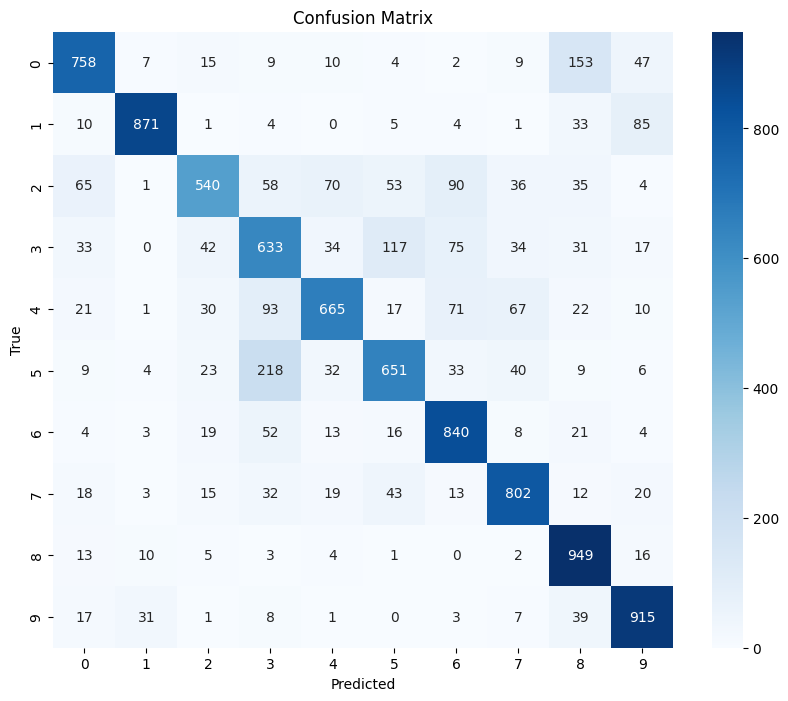

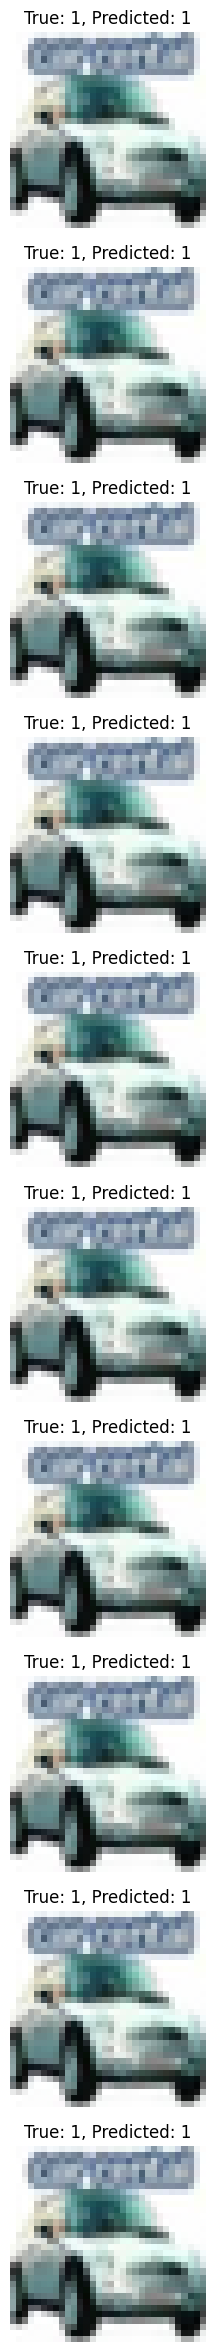

In [19]:
#Predict on the validation set
y_pred = model.predict(x_val)
y_pred_classes = np.argmax(y_pred, axis=1)

#Calculate and print classification metrics
print(classification_report(y_val, y_pred_classes))

#Plot confusion matrix
cm = confusion_matrix(y_val, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

#Visualize misclassifications
misclassified_indices = np.where(y_val != y_pred_classes)[0]
num_misclassified = min(10, len(misclassified_indices)) # Show up to 10

plt.figure(figsize=(15, 3 * num_misclassified))

for i in range(num_misclassified):
    index = misclassified_indices[i]
    plt.subplot(num_misclassified, 3, 3*i + 1)
    plt.imshow(x_val[index])
    plt.title(f"True: {y_val[index][0]}, Predicted: {y_pred_classes[index]}")
    plt.axis('off')
plt.show()

Final Test Loss: 0.7177
Final Test Accuracy: 0.7524
313/313 ━━━━━━━━━━━━━━━━━━━━ 24s 76ms/step
              precision    recall  f1-score   support

           0       0.77      0.73      0.75      1000
           1       0.92      0.84      0.88      1000
           2       0.79      0.54      0.64      1000
           3       0.56      0.62      0.59      1000
           4       0.77      0.65      0.71      1000
           5       0.71      0.63      0.67      1000
           6       0.73      0.86      0.79      1000
           7       0.81      0.81      0.81      1000
           8       0.72      0.94      0.82      1000
           9       0.81      0.88      0.84      1000

    accuracy                           0.75     10000
   macro avg       0.76      0.75      0.75     10000
weighted avg       0.76      0.75      0.75     10000



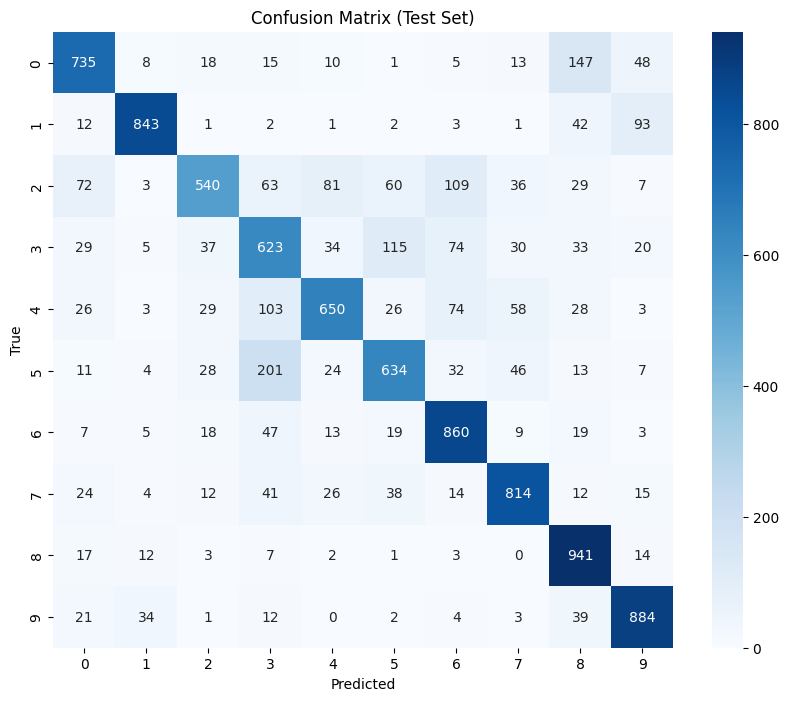

In [20]:
#Final Model Testing
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Final Test Loss: {loss:.4f}")
print(f"Final Test Accuracy: {accuracy:.4f}")

#Predict on the test set
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

#Calculate and print classification metrics for the test set
print(classification_report(y_test, y_pred_classes))

#Plot confusion matrix for the test set
cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Test Set)')
plt.show()